## Import thư viện


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler

## Download dữ liệu phân bón từ google drive về

In [2]:
!gdown --id 1Ca3JUKq-r9J_1KhUlpXleQhH2C2m6jWw
!gdown --id 1zjHTaRmrTsRg51e6_sN75uvvYlLlrXED

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ca3JUKq-r9J_1KhUlpXleQhH2C2m6jWw
To: /content/chemical_analysis.xlsx
100% 56.2k/56.2k [00:00<00:00, 93.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zjHTaRmrTsRg51e6_sN75uvvYlLlrXED
To: /content/spectra.xlsx
100% 4.38M/4.38M [00:00<00:00, 26.1MB/s]


In [3]:
chemical_df = pd.read_excel('/content/chemical_analysis.xlsx')
spectral_df = pd.read_excel('/content/spectra.xlsx')

## Tổng hợp thông tin 2 bảng

In [4]:
spectra_data = spectral_df.iloc[:, 1:]
classes = chemical_df['Manure_type']
data = pd.concat([classes, spectra_data], axis=1)
spectra_data = data.iloc[:, 1:]

In [5]:
spectra_data = spectra_data.copy()
spectra_data = spectra_data.apply(lambda x: x.str.replace(',', '.', regex=True))
wavelengths = pd.DataFrame(spectra_data.columns).apply(lambda x: x.str.replace('_nm', '', regex=True)).values.astype(float)

In [6]:
X, y = spectra_data.values.astype(float) ,classes.values

## Trực quan dữ liệu phổ NIR

In [ ]:
def visualize_spectra(manure_name):
    num_lines = X[y == manure_name].shape[0]
    plt.figure(figsize=(6, 3))
    for i in range(num_lines):
      plt.plot(wavelengths,X[i, :])
    plt.xlabel('Wavelength')
    plt.ylabel('Absorbance')
    plt.title(manure_name)
    plt.show()

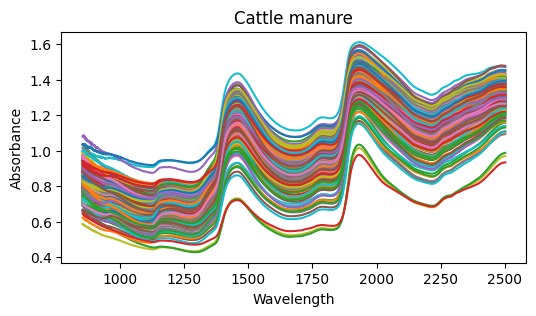

In [ ]:
visualize_spectra("Cattle manure")

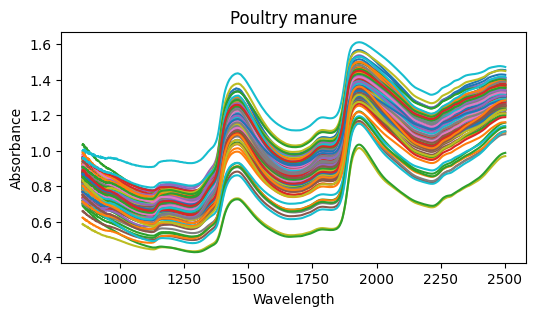

In [ ]:
visualize_spectra("Poultry manure")

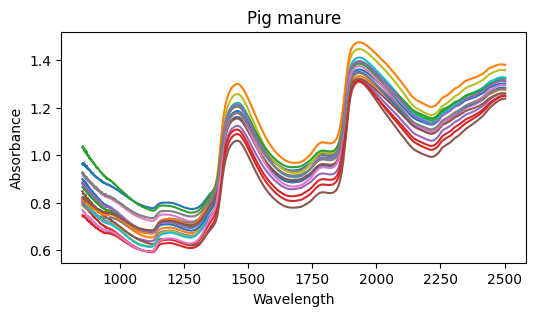

In [ ]:
visualize_spectra("Pig manure")

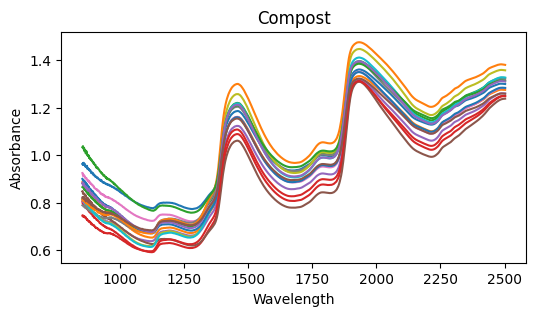

In [ ]:
visualize_spectra("Compost")

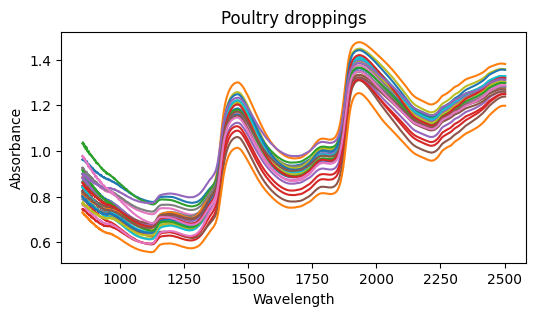

In [ ]:
visualize_spectra("Poultry droppings")

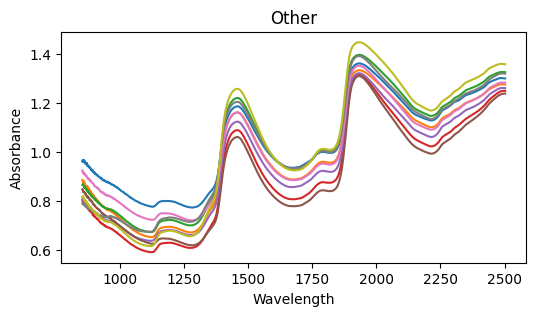

In [ ]:
visualize_spectra("Other")

## Preprocessing

In [ ]:
def visualize_spectra_compare(manure_name,status):
    num_lines = X[y == manure_name].shape[0]
    plt.figure(figsize=(6, 3))
    for i in range(num_lines):
      plt.plot(wavelengths,X[i, :])
    plt.xlabel('Wavelength')
    plt.ylabel('Absorbance')
    plt.title(manure_name + " " + status)
    plt.show()

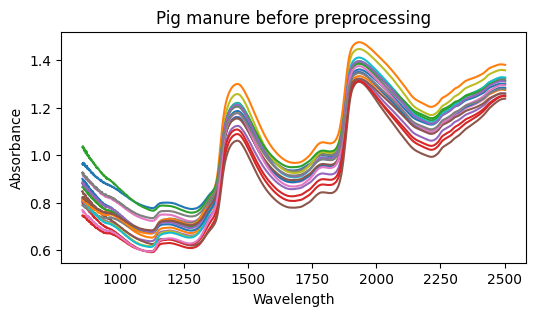

In [ ]:
visualize_spectra_compare("Pig manure","before preprocessing")

In [ ]:
# spectra_data = spectra_data.astype('float64')
spectra_data = spectra_data.apply(lambda x: savgol_filter(x, 21, 3), axis=0)

In [ ]:
X = spectra_data.values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

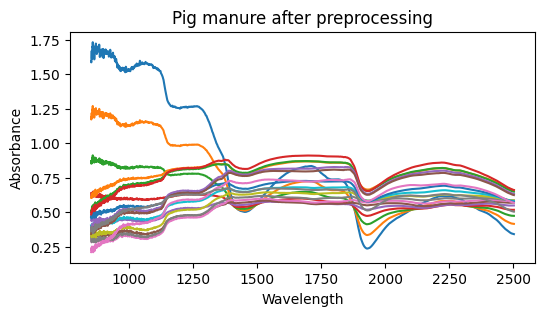

In [ ]:
visualize_spectra_compare("Pig manure","after preprocessing")

## Trực quan 1 phổ NIR duy nhất

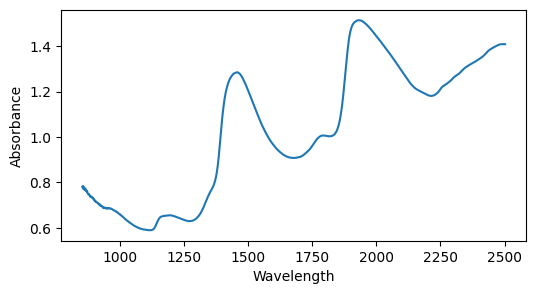

In [7]:
plt.figure(figsize=(6, 3))
plt.plot(wavelengths,X[100, :])
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')
plt.show()